<h1><center> Email Spam Detection with Machine Learning<center> <h1>

# Data Description

This dataset is composed of 2 columns:
1. class which contains 2 classes spam and ham
2. sms which is the actual message.

In [54]:
#Importing the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
#Loading the dataset
mail_data=pd.read_csv('/content/spam.csv',encoding='latin-1')
mail_data=mail_data[['v1','v2']]

In [56]:
mail_data.columns=['class','sms']

In [57]:
mail_data

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Data Analysis and Cleaning

In [58]:
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [59]:
mail_data.isnull().sum()

class    0
sms      0
dtype: int64

In [60]:
mail_data.describe()

,class,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [61]:
mail_data['length']=mail_data['sms'].apply(len)

In [62]:
mail_data

,class,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [63]:
mail_data.groupby('class').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
class                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

Text(0.5, 0, 'Message Length')

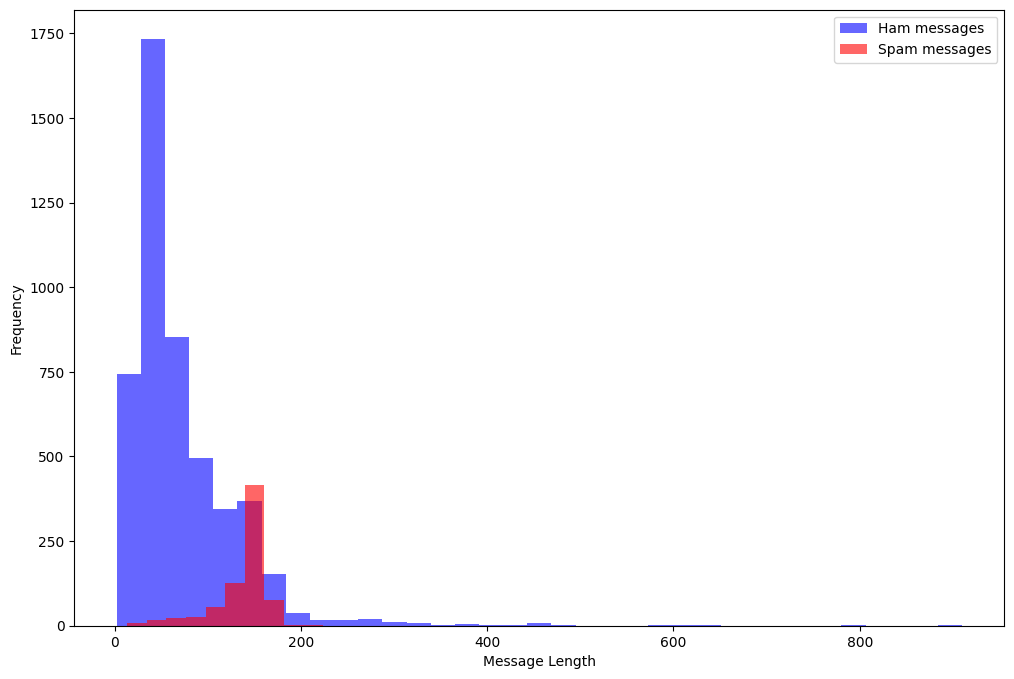

In [64]:
plt.figure(figsize=(12, 8))

mail_data[mail_data['class']=='ham'].length.plot(bins=35, kind='hist', color='blue',
                                       label='Ham messages', alpha=0.6)
mail_data[mail_data['class']=='spam'].length.plot(kind='hist', color='red',
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [66]:
mail_data[mail_data['class']=='spam']['sms']

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: sms, Length: 747, dtype: object

In [67]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [68]:
mail_data['sms']=mail_data['sms'].apply(clean_text)

In [69]:
Stopwords=stopwords.words('english')
Stopwords=Stopwords+['u','im','c']

In [70]:
mail_data['sms'].apply(lambda x:[x for x in x.split() if x not in Stopwords])
mail_data

,class,sms,length
0,ham,go until jurong point crazy available only in ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry in a wkly comp to win fa cup final...,155
3,ham,u dun say so early hor u c already then say,49
4,ham,nah i dont think he goes to usf he lives aroun...,61
...,...,...,...
5567,spam,this is the time we have tried contact u u h...,161
5568,ham,will ì b going to esplanade fr home,37
5569,ham,pity was in mood for that soany other suggest...,57
5570,ham,the guy did some bitching but i acted like id ...,125


# Data PreProcessing

In [71]:
#Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def stemm_text(text):
  text = ' '.join(ps.stem(word) for word in text.split(' '))
  return text

In [72]:
mail_data['sms']=mail_data['sms'].apply(stemm_text)

In [73]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(mail_data['class'])

mail_data['target_encoded'] = le.transform(mail_data['class'])
mail_data.head()

,class,sms,length,target_encoded
0,ham,go until jurong point crazi avail onli in bugi...,111,0
1,ham,ok lar joke wif u oni,29,0
2,spam,free entri in a wkli comp to win fa cup final...,155,1
3,ham,u dun say so earli hor u c alreadi then say,49,0
4,ham,nah i dont think he goe to usf he live around ...,61,0


In [74]:
x=mail_data['sms']
y=mail_data['target_encoded']

In [75]:
print(len(x), len(y))

5572 5572


In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

4179 4179
1393 1393


In [77]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [78]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [79]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<4179x5810 sparse matrix of type '<class 'numpy.float64'>'
	with 51465 stored elements in Compressed Sparse Row format>

In [80]:
texts = mail_data['sms']
target = mail_data['target_encoded']

# Tokenization

We need to perform tokenization - the processing of segmenting text into sentences of words. In the process we throw away punctuation and extra symbols too. The benefit of tokenization is that it gets the text into a format that is easier to convert to raw numbers, which can actually be used for processing

In [81]:
from keras.preprocessing.text import Tokenizer

# Calculate the length of our vocabulary
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

6872

In [82]:
def embed(corpus):
    return word_tokenizer.texts_to_sequences(corpus)

In [83]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
from nltk.tokenize import word_tokenize
long_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(long_train))

In [85]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    accuracy_score
)


In [86]:
train_padded_sentences = pad_sequences(
    embed(texts),
    length_long_sentence,
    padding='post'
)

train_padded_sentences


array([[  24,  439, 3302, ...,    0,    0,    0],
       [  48,  326,  628, ...,    0,    0,    0],
       [  49,  453,   10, ...,    0,    0,    0],
       ...,
       [6870,   63,   10, ...,    0,    0,    0],
       [   5,  220,  119, ...,    0,    0,    0],
       [2098,    8,  476, ...,    0,    0,    0]], dtype=int32)

# Glove Model for Word Embedding

To obtain a vector representation for words we can use an unsupervised learning algorithm called GloVe (Global Vectors for Word Representation), which focuses on words co-occurrences over the whole corpus. Its embeddings relate to the probabilities that two words appear together

In [87]:
embeddings_dictionary = dict()
embedding_dim = 100

with open('/content/glove.6B.100d.txt') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions


In [88]:
# Now we will load embedding vectors of those words that appear in the
# Glove dictionary. Others will be initialized to 0.

embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.18970001,  0.050024  ,  0.19084001, ..., -0.39804   ,
         0.47646999, -0.15983   ],
       [-0.046539  ,  0.61966002,  0.56647003, ..., -0.37616   ,
        -0.032502  ,  0.80620003],
       ...,
       [ 0.63009   , -0.036992  ,  0.24052   , ...,  0.10029   ,
         0.056822  ,  0.25018999],
       [-0.12002   , -1.23870003, -0.23303001, ...,  0.13658001,
        -0.61848003,  0.049843  ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# Building and Training the Model

In [89]:
# Create a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

In [90]:
# Make class and  probability predictions
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [91]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

metrics.confusion_matrix(y_test, y_pred_class)

0.9784637473079684


array([[1194,    8],
       [  22,  169]])

In [92]:
# Calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9631112195206941

In [93]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])

In [94]:
# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

metrics.confusion_matrix(y_test, y_pred_class)

0.9504666188083274


array([[1202,    0],
       [  69,  122]])

# LSTM Model

In [95]:
import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM,
                          Embedding,
                          BatchNormalization,
                          Dense,
                          TimeDistributed,
                          Dropout,
                          Bidirectional,
                          Flatten,
                          GlobalMaxPool1D)


In [96]:
def glove_lstm():
    model = Sequential()

    model.add(Embedding(
        input_dim=embedding_matrix.shape[0],
        output_dim=embedding_matrix.shape[1],
        weights = [embedding_matrix],
        input_length=length_long_sentence
    ))

    model.add(Bidirectional(LSTM(
        length_long_sentence,
        return_sequences = True,
        recurrent_dropout=0.2
    )))

    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = glove_lstm()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 171, 100)          687200    
                                                                 
 bidirectional_2 (Bidirecti  (None, 171, 342)          372096    
 onal)                                                           
                                                                 
 global_max_pooling1d_2 (Gl  (None, 342)               0         
 obalMaxPooling1D)                                               
                                                                 
 batch_normalization_2 (Bat  (None, 342)               1368      
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 342)               0         
                                                      

In [97]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences,
    target,
    test_size=0.25
)

In [98]:
model = glove_lstm()

checkpoint = ModelCheckpoint(
    'model.h5',
    monitor = 'val_loss',
    verbose = 1,
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.2,
    verbose = 1,
    patience = 5,
    min_lr = 0.001
)
history = model.fit(
    X_train,
    y_train,
    epochs = 7,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)


Epoch 1/7
131/131 [==============================] - ETA: 0s - loss: 0.2150 - accuracy: 0.9280
Epoch 1: val_loss improved from inf to 0.24296, saving model to model.h5
131/131 [==============================] - 192s 1s/step - loss: 0.2150 - accuracy: 0.9280 - val_loss: 0.2430 - val_accuracy: 0.9318 - lr: 0.0010
Epoch 2/7


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


131/131 [==============================] - ETA: 0s - loss: 0.1378 - accuracy: 0.9617
Epoch 2: val_loss improved from 0.24296 to 0.17940, saving model to model.h5
131/131 [==============================] - 181s 1s/step - loss: 0.1378 - accuracy: 0.9617 - val_loss: 0.1794 - val_accuracy: 0.9670 - lr: 0.0010
Epoch 3/7
131/131 [==============================] - ETA: 0s - loss: 0.1160 - accuracy: 0.9687
Epoch 3: val_loss improved from 0.17940 to 0.13511, saving model to model.h5
131/131 [==============================] - 181s 1s/step - loss: 0.1160 - accuracy: 0.9687 - val_loss: 0.1351 - val_accuracy: 0.9612 - lr: 0.0010
Epoch 4/7
131/131 [==============================] - ETA: 0s - loss: 0.0751 - accuracy: 0.9739
Epoch 4: val_loss improved from 0.13511 to 0.09599, saving model to model.h5
131/131 [==============================] - 180s 1s/step - loss: 0.0751 - accuracy: 0.9739 - val_loss: 0.0960 - val_accuracy: 0.9806 - lr: 0.0010
Epoch 5/7
131/131 [==============================] - ETA: 0

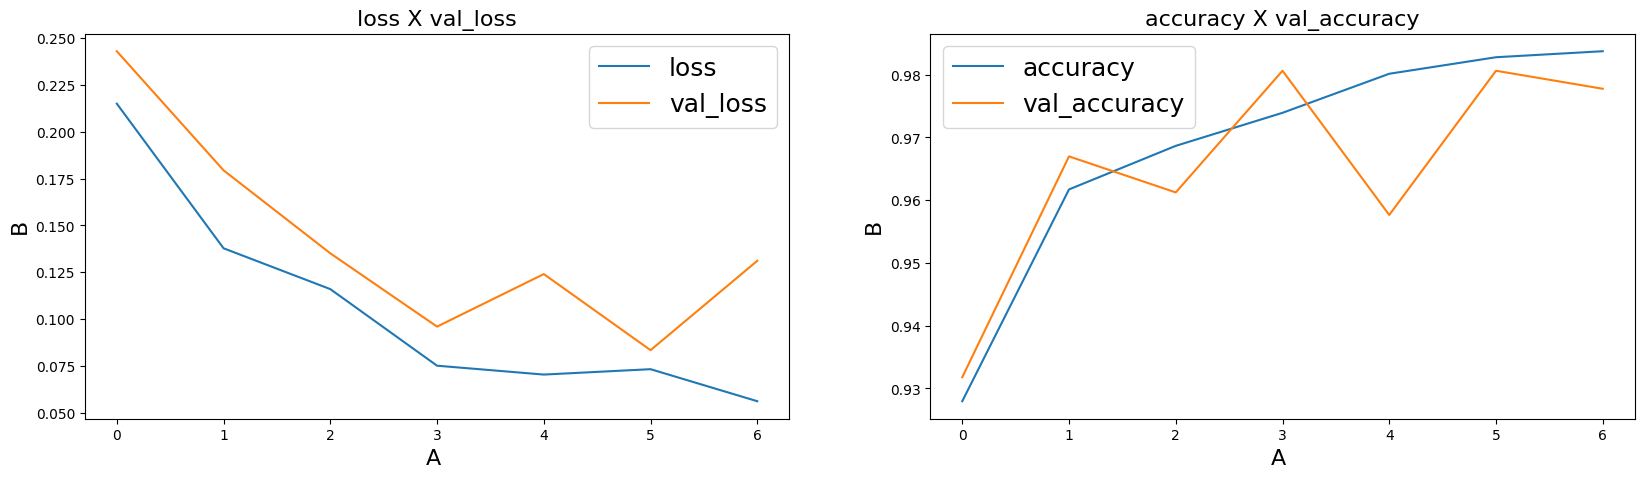

In [99]:

def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

# Observations:

- We can see that the val_loss is more than the loss which means that the model is performing a bit poor .
- Since the model performs a bit poor on valid set it is evident from the loss graphs that the val_accuracy is slightly low compared to train accuracy.

In [100]:
y_preds = (model.predict(X_test) > 0.5).astype("int32")
metrics.confusion_matrix(y_test, y_preds)

44/44 [==============================] - 9s 199ms/step


array([[1194,    6],
       [  25,  168]])

#Observation:
- it is clear that LSTM performs well on text data compared to rest of the models.

# Giving the Input Message and predicting whether it belong to class Ham or spam.

In [101]:
user_input = "Hi, How r u dng."
# Preprocess the user input
cleaned_input = clean_text(user_input)  # Clean the text
stemmed_input = stemm_text(cleaned_input)  # Apply stemming

# Tokenize and pad the input
tokenized_input = word_tokenizer.texts_to_sequences([stemmed_input])  # Convert text to sequence
padded_input = pad_sequences(tokenized_input, maxlen=length_long_sentence, padding='post')  # Pad the sequence

# Predict the class using the LSTM model
prediction = model.predict(padded_input)  # Get the prediction
predicted_class = (prediction > 0.5).astype("int32")  # Convert prediction to class label

# Output the predicted class
if predicted_class[0] == 0:
    print("The message is classified as Ham.")
else:
    print("The message is classified as Spam.")

1/1 [==============================] - 0s 264ms/step
The message is classified as Ham.
